# Keras Autoencoder for MNIST and FashionMnist

Within this Notebook we will discover the Autoencoder on MNist and Fashion Mnist!

First we will investigate he Autoencoder on Mnist. Remember what the TSNE looked like when we ploted that the first time. 

<img src="./Images/TSNE MNIST woAE.PNG" alt="Drawing" style="width: 500px;"/>

In [6]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model
import os



bottleneck_size = 2

input_img = Input(shape=(784,))

encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)


encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(64, activation='relu')(encoded_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')


######
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)


###########
if "model_3.h5" in os.listdir():
    ae = load_model('model_2.h5')
    encoder = load_model('encoder.h5')
    decoder = load_model('decoder.h5')
else:
    ae.fit(x_train, x_train, 
        epochs = 10,
        batch_size=256,
        validation_data=(x_test, x_test))
    ae.save('model_2.h5')
    encoder.save('encoder.h5')
    decoder.save('decoder.h5')


encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0683 - val_loss: 0.0525
Epoch 2/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0499 - val_loss: 0.0467
Epoch 3/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0449 - val_loss: 0.0431
Epoch 4/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0423 - val_loss: 0.0414
Epoch 5/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0409 - val_loss: 0.0403
Epoch 6/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0399 - val_loss: 0.0396
Epoch 7/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0392 - val_loss: 0.0391
Epoch 8/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0385 - val_loss: 0.0385
Epoch 9/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0379 - val_

This Autoencoder has a Bottleneck size of 2. Therfore we can directly print the bottleneck. 
The latent space of this Autoencoder looks like this now:

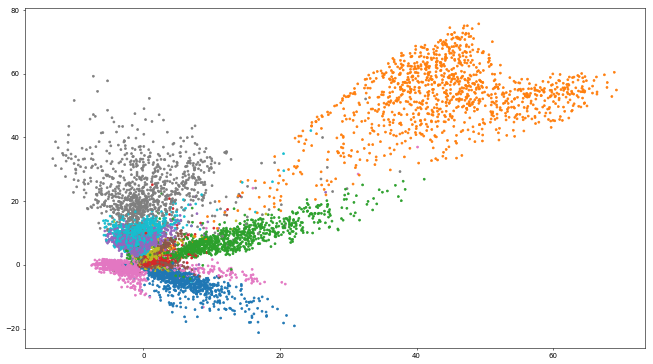

In [7]:
cm = matplotlib.cm.get_cmap('tab10')
colors = [cm(x) for x in y_test]

plt.figure(figsize=(16,9), dpi=50)
plt.scatter(encoded_imgs[:,0],encoded_imgs[:,1],
	c=y_test, s=8, cmap='tab10')

We can clearly see that the autoencoder grouped our data and found a good projection of high dimentional data into the 2D space. 

Now lets ingrease the bottleneck size to something mor complicated.

In [8]:
bottleneck_size = 32

input_img = Input(shape=(784,))

encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)


encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(64, activation='relu')(encoded_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')


######
from keras.datasets import mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)


###########
if "model_33.h5" in os.listdir():
    ae = load_model('model_32.h5')
    encoder = load_model('encoder.h5')
    decoder = load_model('decoder.h5')
else:
    ae.fit(x_train, x_train, 
        epochs = 10,
        batch_size=256,
        validation_data=(x_test, x_test))
    ae.save('model_32.h5')
    encoder.save('encoder.h5')
    decoder.save('decoder.h5')


encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0521 - val_loss: 0.0282
Epoch 2/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0235 - val_loss: 0.0191
Epoch 3/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0178 - val_loss: 0.0160
Epoch 4/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0152 - val_loss: 0.0142
Epoch 5/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0136 - val_loss: 0.0130
Epoch 6/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0125 - val_loss: 0.0120
Epoch 7/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0117 - val_loss: 0.0112
Epoch 8/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0110 - val_loss: 0.0104
Epoch 9/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0103 - val_

Lets plot our encoded images, our latent vector and our decoded images!

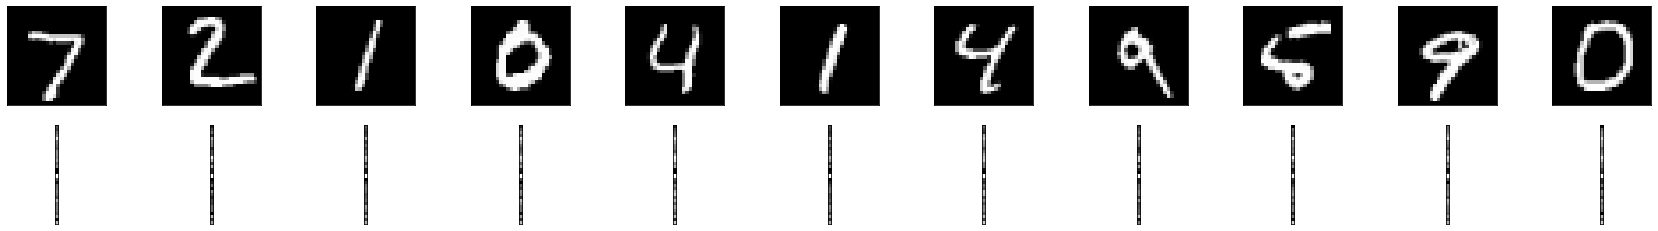

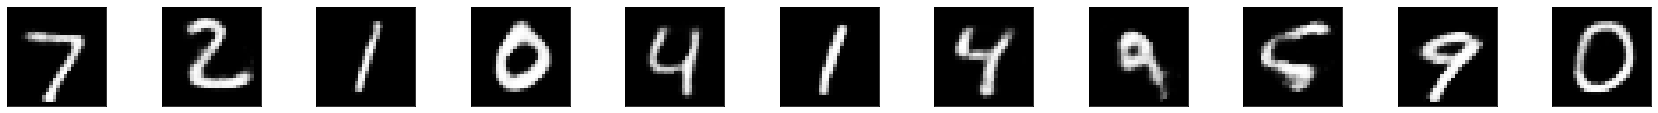

In [9]:
n = 11  # How many digits we will display
plt.figure(figsize=(30, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display encoded
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(bottleneck_size, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()
plt.figure(figsize=(30, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

With our new latent space size of 32 dimensions, we are no longer able to view our results directly again. We need t-SNE again.

#**Time Consumin TSNE calculation befor applieing AE - we can skip that**

y_test=test_labels
flatted_input = np.reshape(encoded_imgs, ( encoded_imgs.shape[0], encoded_imgs.shape[1]))
from sklearn.manifold import TSNE
low_dim_transformer = TSNE(n_components=2)

transformed_input = low_dim_transformer.fit_transform(flatted_input)
cm = matplotlib.cm.get_cmap('tab10')

colors = [cm(x) for x in test_labels]

plt.figure(figsize=(16,9), dpi=100)

plt.scatter(transformed_input[:, 0], transformed_input[:, 1], c=colors)

plt.show() 

<img src="./Images/TSNE MNIST withAE.PNG" alt="Drawing" style="width: 500px;"/>

We see that our autoencoder did the same as before, finding a good representation of our data! Now the representations look even cleaner! :-)

# AE for Fashion Mnist

In [10]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

bottleneck_size = 5

input_img = Input(shape=(784,))

encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)


encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(64, activation='relu')(encoded_input)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')

We need to retrain our network with the new data!

In [11]:
    ae.fit(x_train, x_train, 
        epochs = 10,
        batch_size=256,
        validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 25us/sample - loss: 0.0473 - val_loss: 0.0255
Epoch 2/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0231 - val_loss: 0.0216
Epoch 3/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0205 - val_loss: 0.0199
Epoch 4/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0194 - val_loss: 0.0191
Epoch 5/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0188 - val_loss: 0.0186
Epoch 6/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0183 - val_loss: 0.0183
Epoch 7/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0179 - val_loss: 0.0179
Epoch 8/10
60000/60000 [==============================] - 1s 14us/sample - loss: 0.0176 - val_loss: 0.0177
Epoch 9/10
60000/60000 [==============================] - 1s 15us/sample - loss: 0.0173 - val_

In [12]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

Now lets plot how our pictures, the flattened latent space and our reconstructions look like!

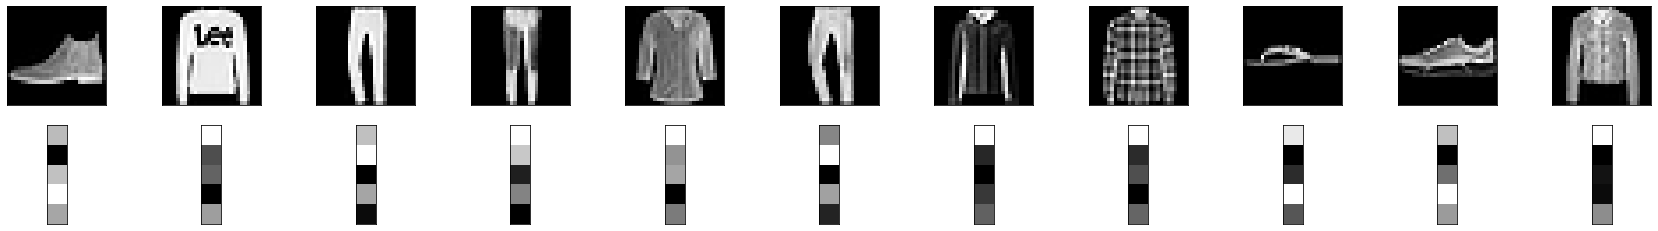

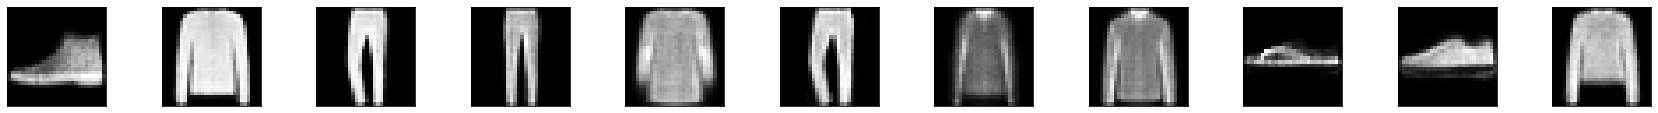

In [13]:

n = 11  # How many digits we will display
plt.figure(figsize=(30, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # Display encoded
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(bottleneck_size, 1))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()
plt.figure(figsize=(30, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

## With regularization

In [14]:
from tensorflow.keras import regularizers

fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32')  / 255.
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0], 784)

bottleneck_size = 5

input_img = Input(shape=(784,))

encoded = Dense(512, activity_regularizer=regularizers.l1(10e-5),activation='relu')(input_img)
encoded = Dense(128, activity_regularizer=regularizers.l1(10e-5),activation='relu')(encoded)
encoded = Dense(64, activity_regularizer=regularizers.l1(10e-5),activation='relu')(encoded)
encoded = Dense(bottleneck_size, activation='linear')(encoded)
encoder = Model(input_img, encoded)


encoded_input = Input(shape=(bottleneck_size,))
decoded = Dense(64, activity_regularizer=regularizers.l1(10e-5),activation='relu')(encoded_input)
decoded = Dense(128, activity_regularizer=regularizers.l1(10e-5),activation='relu')(decoded)
decoded = Dense(512, activity_regularizer=regularizers.l1(10e-5),activation='relu')(decoded)
decoded = Dense(784, activity_regularizer=regularizers.l1(10e-5),activation='sigmoid')(decoded)
decoder = Model(encoded_input, decoded)

full = decoder(encoder(input_img))
ae = Model(input_img, full)
ae.compile(optimizer='adam', loss='mean_squared_error')

In [15]:
    ae.fit(x_train, x_train, 
        epochs = 10,
        batch_size=256,
        validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1064 - val_loss: 0.0703
Epoch 2/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0664 - val_loss: 0.0629
Epoch 3/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0601 - val_loss: 0.0573
Epoch 4/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0555 - val_loss: 0.0534
Epoch 5/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0512 - val_loss: 0.0501
Epoch 6/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0493 - val_loss: 0.0488
Epoch 7/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0482 - val_loss: 0.0479
Epoch 8/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0473 - val_loss: 0.0470
Epoch 9/10
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0466 - val_

## Convolutional autoencoder

In [16]:
from tensorflow.keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


In [17]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


In [18]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 16s 271us/sample - loss: 0.2153 - val_loss: 0.1505
Epoch 2/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1394 - val_loss: 0.1297
Epoch 3/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1264 - val_loss: 0.1213
Epoch 4/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1198 - val_loss: 0.1166
Epoch 5/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1157 - val_loss: 0.1127
Epoch 6/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1128 - val_loss: 0.1102
Epoch 7/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1107 - val_loss: 0.1084
Epoch 8/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1090 - val_loss: 0.1071
Epoch 9/50
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1076 - va

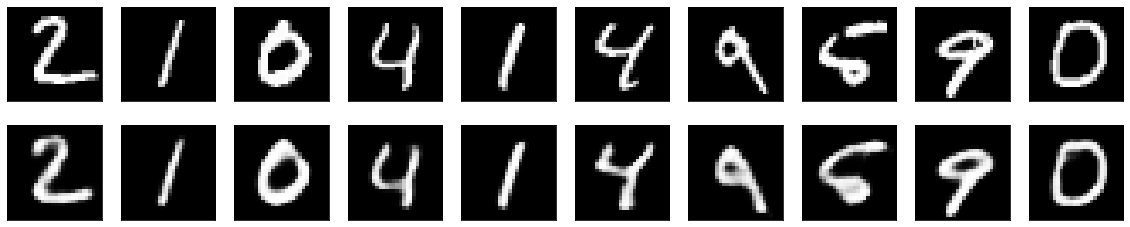

In [19]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


## Denoising

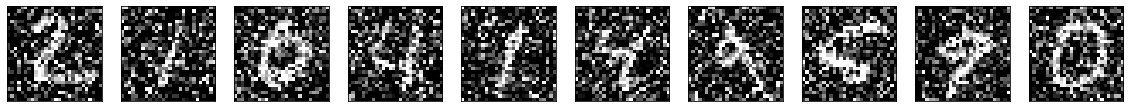

In [20]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [21]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [22]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1616 - val_loss: 0.1154
Epoch 2/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1118 - val_loss: 0.1079
Epoch 3/100
60000/60000 [==============================] - 2s 33us/sample - loss: 0.1063 - val_loss: 0.1038
Epoch 4/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1037 - val_loss: 0.1023
Epoch 5/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1021 - val_loss: 0.1010
Epoch 6/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1010 - val_loss: 0.0998
Epoch 7/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.1001 - val_loss: 0.0995
Epoch 8/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0994 - val_loss: 0.0985
Epoch 9/100
60000/60000 [==============================] - 2s 34us/sample - loss: 0.09

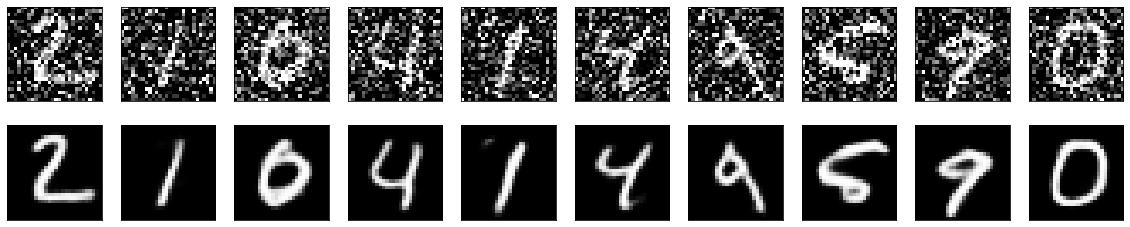

In [23]:
decoded_imgs = autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [24]:
#import os
#temp=os.getpid()
## !kill -9 $temp

### PLEASE RUN THIS COMMAND IF YOU FINISHED THE NOTEBOOK

In [25]:
import os
temp=os.getpid()
!kill -9 $temp